In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def autocov(x, j):
    s = 0
    mean = np.mean(x)
    n = np.size(x)
    for t in range(j, n):
        s += (x[t] - mean)*(x[t-j] - mean)
    return s/(n - 1)

def autocorr(x, j):
    return autocov(x, j)/autocov(x, 0)

In [12]:
x = [2, 3, 1, -1, -4, -2, 0, 2, 1, -2]
rhos = []
for j in range(1, 4):
    rhos.append(autocorr(x, j))
    print("rho_"+str(j), ":", autocorr(x, j))
rhos.append(-1)

rho_1 : 0.45454545454545453
rho_2 : -0.25
rho_3 : -0.5909090909090908


In [15]:
# rhos : (n,1)
def facpe(x, rhos, j):
    A = np.ones((j, j))
    for k in range(j-1):
        A[:k, k] = rhos[:k]
        if k < j-1:
            A[(k+1):, k] = rhos[:-(k+1)]
            A[k, (k+1):] = rhos[:-(k+1)]
            print(A)
    return A

facpe(x, rhos, 4)

[[ 1.          0.45454545 -0.25       -0.59090909]
 [ 0.45454545  1.          1.          1.        ]
 [-0.25        1.          1.          1.        ]
 [-0.59090909  1.          1.          1.        ]]
[[ 1.          0.45454545 -0.25       -0.59090909]
 [ 0.45454545  1.          0.45454545 -0.25      ]
 [-0.25        0.45454545  1.          1.        ]
 [-0.59090909 -0.25        1.          1.        ]]
[[ 1.          0.45454545  0.45454545 -0.59090909]
 [ 0.45454545  1.         -0.25       -0.25      ]
 [-0.25        0.45454545  1.          0.45454545]
 [-0.59090909 -0.25        0.45454545  1.        ]]


array([[ 1.        ,  0.45454545,  0.45454545, -0.59090909],
       [ 0.45454545,  1.        , -0.25      , -0.25      ],
       [-0.25      ,  0.45454545,  1.        ,  0.45454545],
       [-0.59090909, -0.25      ,  0.45454545,  1.        ]])

In [76]:
rho_11 = rhos[0]
print('rho_11 :', rho_11)

# rho_22
A = np.array([[1, rhos[0]], [rhos[0], 1]])
b = np.array([[rhos[0]], [rhos[1]]])
rho_22 = np.matmul(np.linalg.inv(A), b)[1, 0]
print('rho_22 :', rho_22)

# rho_33
A = np.array([[1, rhos[0], rhos[1]], [rhos[0], 1, rhos[0]], [rhos[1], rhos[0], 1]])
b = np.array([[rhos[0]], [rhos[1]], [rhos[2]]])
rho_33 = np.matmul(np.linalg.inv(A), b)[2][0]
print('rho_33 :', rho_33)

rho_11 : 0.45454545454545453
rho_22 : -0.5755208333333333
rho_33 : -0.28321249302844387


In [42]:
def arma11(mu, phi1, theta1, T, x0, sigma2=1):
    e = st.norm.rvs(size=(T), loc=0, scale=sigma2**0.5)
    xs = np.zeros(T)
    xs[0] = x0
    for i in range(1, len(xs)):
        xs[i] = mu + phi1 * xs[i-1] + e[i] - theta1 * e[i-1] 
    return xs

def diff1(x):
    xs = np.zeros((x.size-1))
    for i in range(1, xs.size):
        xs[i-1] = x[i] - x[i-1]
    return xs

In [50]:
xs = arma11(0, 1, 0.6, 500, 1)
diffxs = diff1(xs)

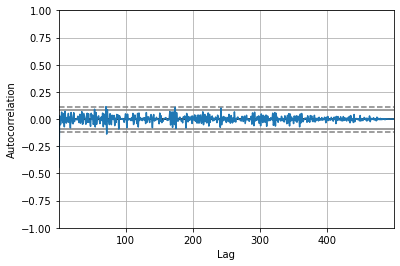

In [51]:
pd.plotting.autocorrelation_plot(diffxs)

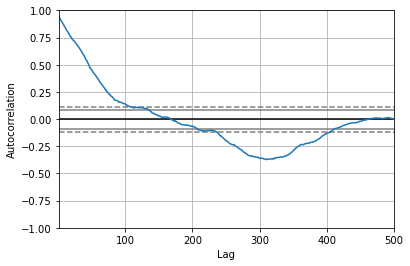

In [52]:
pd.plotting.autocorrelation_plot(xs)

In [8]:
a = [1, 2, 3, 4]

In [9]:
a[:-2]

[1, 2]

In [ ]:
A = np.ones((4, 4))